# Tornadoes [1950-2022]

Source: https://www.kaggle.com/datasets/sujaykapadnis/tornados



variables:

- `om`: Integer - Tornado number. Effectively an ID for this tornado in this year.
- `yr`: Integer - Year, 1950-2022.
- `mo`: Integer - Month, 1-12.
- `dy`: Integer - Day of the month, 1-31.
- `date`: Date - Date.
- `time`: Time - Time.
- `tz`: Character - Canonical tz database timezone.
- `datetime_utc`: Datetime - Date and time normalized to UTC.
- `st`: Character - Two-letter postal abbreviation for the state (DC = Washington, DC; PR = Puerto Rico; VI = Virgin Islands).
- `stf`: Integer - State FIPS (Federal Information Processing Standards) number.
- `mag`: Integer - Magnitude on the F scale (EF beginning in 2007). Some of these values are estimated (see fc).
- `inj`: Integer - Number of injuries. When summing for state totals, use sn == 1 (see below).
- `fat`: Integer - Number of fatalities. When summing for state totals, use sn == 1 (see below).
- `loss`: Double - Estimated property loss information in dollars. Prior to 1996, values were grouped into ranges. The reported number for such years is the maximum of its range.
- `slat`: Double - Starting latitude in decimal degrees.
- `slon`: Double - Starting longitude in decimal degrees.
- `elat`: Double - Ending latitude in decimal degrees.
- `elon`: Double - Ending longitude in decimal degrees.
- `len`: Double - Length in miles.
- `wid`: Double - Width in yards.
- `ns`: Integer - Number of states affected by this tornado. 1, 2, or 3.
- `sn`: Integer - State number for this row. 1 means the row contains the entire track information for this state, 0 means there is at least one more entry for this state for this tornado (om + yr).
- `f1`: Integer - FIPS code for the 1st county.
- `f2`: Integer - FIPS code for the 2nd county.
- `f3`: Integer - FIPS code for the 3rd county.
- `f4`: Integer - FIPS code for the 4th county.
- `fc`: Logical - Was the mag column estimated?

### Scenario:
- We are hired by NOAA to investigate the US tornadic activity from historical data, from 1950 to today.

### Objectives:
- Understand the historical trends of tornadoes. This includes examination of qualities such as severity, duration, and geographical area affected.
- Determine how these qualities have changed over time by comparing old figures to those from present day.
- Make statement(s) about the pattern(s) in tornadic activity we find. We hope to use any found information to make recommendations for next steps in more robust efforts to quantify future expectations of tornadic activity, such as predictive modeling and forecasting.  
- 
-

### Questions:
1. **Tornado severity**
- Has the length of paths changed? (look at both the average, and median)
- Has the severity (on F/EF scale) changed?

2. **Tornado freqency**
- Has tornado frequency increased over time?
- Has the freqency of more severe tornados increased over time?

3. **Tornado zone** (Optional)
- Has "tornado alley" increased/decreased in size over time? (look at "states effected")
- And/or has this area moved?  



### Data Acquisition
`Tornadoes.csv`

In [ ]:
import pandas as pd

tornadoes = pd.read_csv('tornados.csv', index_col=None)
tornadoes.head()


In [ ]:
tornadoes.info()

### Initial Data Exploration
1. check dataset shape
2. check data types
3. obtain basic statistics for quantitative/numeric columns

In [ ]:
# Get the size of the dataset
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\nThere are " + str(tornadoes.shape[1]) + " columns and " + str(tornadoes.shape[0]) + " rows.\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

In [ ]:
# Display columns in tornadoes
tornadoes.columns

In [ ]:
# Display dtypes of all variables
tornadoes.dtypes

In [ ]:
# Display descriptive stats for numerical columns
tornadoes.describe().round(3)

### Dataset Size: 
- Number of rows (tornadoes): 68,693
- Number of columns (variables): 21

### Data Types:

- **Numerical Data (int64 or float64)**: `om`, `yr`, `mo`, `dy`, `stf`, `mag`, `inj`, `fat`, `loss`, `slat`, `slon`, `elat`, `elon`, `len`, `wid`, `ns`, `sn`, `f1`, `f2`, `f3`, `f4`
- **Categorical Data (object)**: `date`, `time`, `tz`, `datetime_utc`, `st`
- **Boolean Data (bool)**: `fc`

### Basic Statistics:
For the numerical columns:
- `om`: Ranges from 1 to 622,080.
- `yr`: Ranges from 1950 to 2022.
- `mo`: Ranges from 1 to 12.
- `dy`: Ranges from 1 to 31.
- `stf`: Ranges from 1 to 78.
- `mag`: Ranges from 0 to 5.
- `inj`: Ranges from 0 to 1,740.
- `fat`: Ranges from 0 to 158.
- `loss`: Ranges from $50 to $2,800,100,000.
- `slat`: Ranges from 17.7212 to 61.02.
- `slon`: No specific range provided.
- `elat`: Has a minimum value of 0.
- `elon`: No specific range provided.
- `len`: Ranges from 0 to 234.7 miles.
- `wid`: Ranges from 0 to 4,576 yards.
- `ns`: Ranges from 1 to 3.
- `sn`: Ranges from 0 to 1.
- `f1`: Has a maximum value of 810.
- `f2`: Has a maximum value of 820.
- `f3`: Has a maximum value of 710.
- `f4`: Has a maximum value of 507.

# Data Cleansing: 
1. identify **missing values** and decide whether to impute, fill, or drop.

2. check for and remove **duplicates**.

3. ensure that each column is of the correct **data type**, and convert if not.

4. look for **outliers** using statistical methods or visualization.  

5. **standardization**: if necessary

In [ ]:
# Check for missing values
missing_values = tornadoes.isnull().sum()

# Calculate missing value counts
missing_values = pd.DataFrame(missing_values[missing_values > 0])

# Calculate missing percent of values for each column
missing_pct = ((missing_values/tornadoes.shape[0]*100).round(3))

# Add missing count and percent to table
missing_values["% Missing"] = missing_pct
missing_values.rename(columns={0: 'Count Missing'}, inplace=True)
missing_values

In [ ]:
# Visualize missing values
import missingno as msno
msno.matrix(tornadoes)

columns with missing values:
- **mag**: 756 missing values, or 1.101%
- **loss**: 27170 missing values, or 38.553%

how we will handle these:
- **mag**: Drop rows with missing values since it only accounts for about 1% of data.
- **loss**: Dropping this variable since it isn't needed.

In [ ]:
# Fill missing loss variable.
tornadoes['loss'].fillna(method='ffill',inplace=True)

In [ ]:
tornadoes.info()

now that missing values have been handled, we'll check for duplicates. 

In [ ]:
# Check for duplicate rows
duplicate_rows = tornadoes.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

# Get a boolean series indicating which rows are duplicates (including the original rows)
duplicate_mask_all = tornadoes.duplicated(keep=False)

# Use this mask to filter and display both the original and duplicate rows
duplicate_rows_all_df = tornadoes[duplicate_mask_all]
duplicate_rows_all_df

In [ ]:
# Remove duplicate rows, if any
if duplicate_rows > 0: 
    tornadoes.drop_duplicates(inplace=True)

# Verify that the removal worked
duplicate_rows = tornadoes.duplicated().sum()
print("There are " + str(duplicate_rows) + " duplicate row(s).\n")

now let's determine if any data types need conversion.

In [ ]:
# Display data types for each column
tornadoes.dtypes

we might consider changing `date` (the date), `time` (the time), and `datetime_utc` (the date and time normalized to UTC) from objects to DateTime. But we can wait to do this until we know we need these columns

### 1. quick feature creation
**create `region`:**  
below we establish a dictionary for all 50 possible us states. then, iterate thru `st` and classify each state into a region by postal code.  

In [ ]:
# Dictionary to map the 50 US states to regions
states_and_regions = {
    'ME': 'New England', 'NH': 'New England', 'VT': 'New England', 'MA': 'New England', 
    'RI': 'New England', 'CT': 'New England',
    
    'NY': 'Mid-Atlantic', 'NJ': 'Mid-Atlantic', 'PA': 'Mid-Atlantic', 
    'DE': 'Mid-Atlantic', 'MD': 'Mid-Atlantic', 'DC': 'Mid-Atlantic', 
    
    'VA': 'Upper South', 'WV': 'Upper South', 'KY': 'Upper South', 'TN': 'Upper South', 
    'NC': 'Upper South', 'AR': 'Upper South', 'MO': 'Upper South',
    
    'OK': 'Deep South', 'SC': 'Deep South', 'GA': 'Deep South', 'AL': 'Deep South', 
    'MS': 'Deep South', 'LA': 'Deep South', 'FL': 'Deep South',
    
    'TX': 'Southwest', 'AZ': 'Southwest', 'NM': 'Southwest', 
    
    'CA': 'Pacific', 'NV': 'Pacific', 'OR': 'Pacific', 'WA': 'Pacific', 'HI': 'Pacific', 
    
    'AK': 'Pacific Northwest',
    
    'OH': 'Midwest', 'MI': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'WI': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'NE': 'Midwest', 'SD': 'Midwest', 'ND': 'Midwest', 
    'KS': 'Midwest',
    
    'MT': 'Mountain West', 'ID': 'Mountain West', 'WY': 'Mountain West', 
    'CO': 'Mountain West', 'UT': 'Mountain West'
}

# Map the states to a region in new column
tornadoes['region'] = tornadoes['st'].map(states_and_regions)

**create `decade`:**  
this will iterate thru `yr` and attach the categorical decade label in new column called `decade`. in the format e.g. "1950-1959"

In [ ]:
# classifies each row's `yr` into new column of objects, `decade`
tornadoes['decade'] = tornadoes['yr'].apply(lambda x: f"{x//10*10}-{x//10*10+9}")

 **create `wid_level`**  
 this will iterate through `wid`, a continuous variable, to classify tornado widths based on three classes tornadoes can be organized into.  
 *get source for class info.*  

In [ ]:
# Create new column that classifies each tornado by width
def wid_categories(wid):
    if wid < 50:
        return 'Narrow (< 50 Yards)'
    elif wid >= 50 and wid < 500:
        return 'Medium (50 - 500 Yards)'
    elif wid >= 500:
        return 'Large (>= 500 Yards)'

tornadoes['wid_level'] = tornadoes['wid'].apply(wid_categories)
tornadoes['wid_level']

**create `wid_category`**  
*forgot if still needed this. might delete.*  

In [ ]:
# Create new column that classifies each tornado by width
def wid_categories2(wid):
    if wid < 50:
        return 'Narrow'
    elif wid >= 50 and wid < 500:
        return 'Medium'
    elif wid >= 500:
        return 'Large'

tornadoes['wid_category'] = tornadoes['wid'].apply(wid_categories2)
tornadoes['wid_category']

**create `Track Length`** 
iterate thru `len` and classify into three classes based on tornado track length (the path in which the tornado takes while it is touching the ground).  
 *get source for class info.*  
 *also consider changing name to be more like wid_length OR vice versa.*  

In [ ]:
# Create new column that classifies each tornado by length
def len_categories(len):
    if len < 10:
        return 'Short_Track (< 10 Miles)'
    elif len >= 10 and len < 50:
        return 'Medium-Track (10 - 50 Miles)'
    elif len >= 50:
        return 'Long-Track (>= 50 Miles)'

tornadoes['Track Length'] = tornadoes['len'].apply(len_categories)
tornadoes['Track Length']

**create `in_alley`**  
using the inside of longitudes -105 and -95 as a general 'tornado alley', classifies each tornado based on it's `slon` (starting longitude) as either 'inside' or 'outside' tonrado alley  
*get source for this info.*  

In [ ]:
# Create new column that classifies each tornado by its location (inside tornado alley, outside tornado alley)
def inside_outside(slon):
    if slon >= -105 and slon <= -95:
        return 'Inside Tornado Alley'
    else:
        return 'Outside Tornado Alley'

tornadoes['in_alley'] = tornadoes['slon'].apply(inside_outside)
tornadoes['in_alley']

**create subset dfs, `tornadoes_1950s` thru `tornadoes_2010s`**  
*might use for examining seasonality and/or geographical representations*  

In [ ]:
# Create subsets of tornadoes for each decade
tornadoes_1950s = tornadoes.query("decade == 1950")
tornadoes_1960s = tornadoes.query("decade == 1960")
tornadoes_1970s = tornadoes.query("decade == 1970")
tornadoes_1980s = tornadoes.query("decade == 1980")
tornadoes_1990s = tornadoes.query("decade == 1990")
tornadoes_2000s = tornadoes.query("decade == 2000")
tornadoes_2010s = tornadoes.query("decade == 2010")

### 2. Visualization
**Tornado frequencies over time**  
*Below, we can see that the overall count of all tornadoes is increasing over time.*  

*Then, we break this down into those tornadoes inside and outside tornado alley. It appears that tornadoes are increasing in frequency outside tornado alley. this suggests that either the area we consider "tornado alley" is either shifting or widening (tornadoes are spilling out).*  

*Using different width classifications, we notice that different widths of tornadoes appear to be increasing at different rates. we definitely see an increased frequency of medium and large width tornadoes, with narrow ones remaining the same or decreaing. This might suggest that overall, tornados are getting bigger.*  

*We also do this with tornado track lengths. it seems that short-track and medium-track tornadoes are increasing in frequency, but long-track ones don't seem to be changing much.*  

**all tornadoes:**

In [ ]:
# Visualize simple frequencies of all tornadoes over time
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=tornadoes, color='black', ax=ax, bins=12)
ax.set_title('Tornado Frequency over time (1950-2022)', weight='bold')

**by location (in/out of tornado alley):**

In [ ]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=tornadoes, hue='in_alley', ax=ax, bins=12)
ax.set_title('Tornado frequencies (inside, outside tornado alley) over Time (1950-2022)', weight='bold')

**by width:**

In [ ]:
# Histogram of the number of different sized tornadoes over time 

# Filter tornadoes by width 
high_wid = tornadoes[tornadoes['wid'] >= 500]
med_wid = tornadoes[(tornadoes['wid'] >= 50) & (tornadoes['wid'] < 500)]
low_wid = tornadoes[tornadoes['wid'] < 50]

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.histplot(x='yr', data=low_wid, color="Blue", ax=ax, bins=12)
sns.histplot(x='yr', data=med_wid, color="Yellow", ax=ax, bins=12)
sns.histplot(x='yr', data=high_wid, color="Green", ax=ax, bins=12)
ax.set_title('Tornado Frequencies over Time (1950-2022) and widths', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Number of tornadoes', weight='bold')

legend_labels=['Narrow (< 50 Yards)', 'Medium (50 - 500 Yards)', 'Large (>= 500 Yards)']
legend_colors=['Blue', 'Yellow', 'Green']
legend_handles = [plt.Line2D([0], [0], marker='s', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Tornado Width')

### 3. statistical analysis
**starting to visualize descriptive statistics of numerical columns**  
*probably could use some more basic univariate visualizations and discussion*  

**various bivariate/multivariate exploratory plots are below**  
*needs some cleanup and discussion*  

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', data=high_wid, palette='Pastel2')
ax.set_title('Large-Width (>= 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', data=med_wid, palette='Pastel2')
ax.set_title('Medium-Width (50 - 500 Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
sns.despine()
sns.boxplot(x='decade', y='wid', hue='in_alley', data=high_wid, palette='Pastel2')
ax.set_title('High-Width (500+ Yard) Tornadoes by Decade (1950-2022)', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.set_ylabel('Width (Yards)', weight='bold')

**what is the frequency of tornadoes across states and regions? what about for larger (higher mag, larger wid, longer len) tornadoes?**
- The top 10 states of all time as well as the regions are shown below.   
*As expected, southern and midwestern regions ad their states are the most common*  
*Visualize this over time*  
*Put total frequency and in/out tornado alley stuff here*

In [ ]:
# Group by year and get the count of each wid category tornadoes for each year
low_wid_counts = low_wid.groupby('yr').size().reset_index(name='count')
med_wid_counts = med_wid.groupby('yr').size().reset_index(name='count')
high_wid_counts = high_wid.groupby('yr').size().reset_index(name='count')

In [ ]:
# Group by year and get the count of each wid category tornadoes for each year
low_wid_counts2 = low_wid.groupby(['yr', 'in_alley']).size().reset_index(name='count')
med_wid_counts2 = med_wid.groupby(['yr', 'in_alley']).size().reset_index(name='count')
high_wid_counts2 = high_wid.groupby(['yr', 'in_alley']).size().reset_index(name='count')

low_wid_counts2 = low_wid_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()
med_wid_counts2 = med_wid_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()
high_wid_counts2 = high_wid_counts2.pivot(index='yr', columns='in_alley', values='count').reset_index()

low_wid_counts2.columns.name = None 
med_wid_counts2.columns.name = None 
high_wid_counts2.columns.name = None 

*> Below, we show graphically the overall frequency within the united states of tornadoes for early and late decades of our data. We also show the approximate locaation of "tornado alley" (in the dotted box) for reference. What we notice is in agreement with the overall frequency findngs we demonstrated earlier- there is a greater overall frequency across all types of tornadoes and all locations. This is apparent from the increased density in the below plot. It is also clear that this trend exists in all areas, not just tornado alley.*

(-130.0, -60.0)

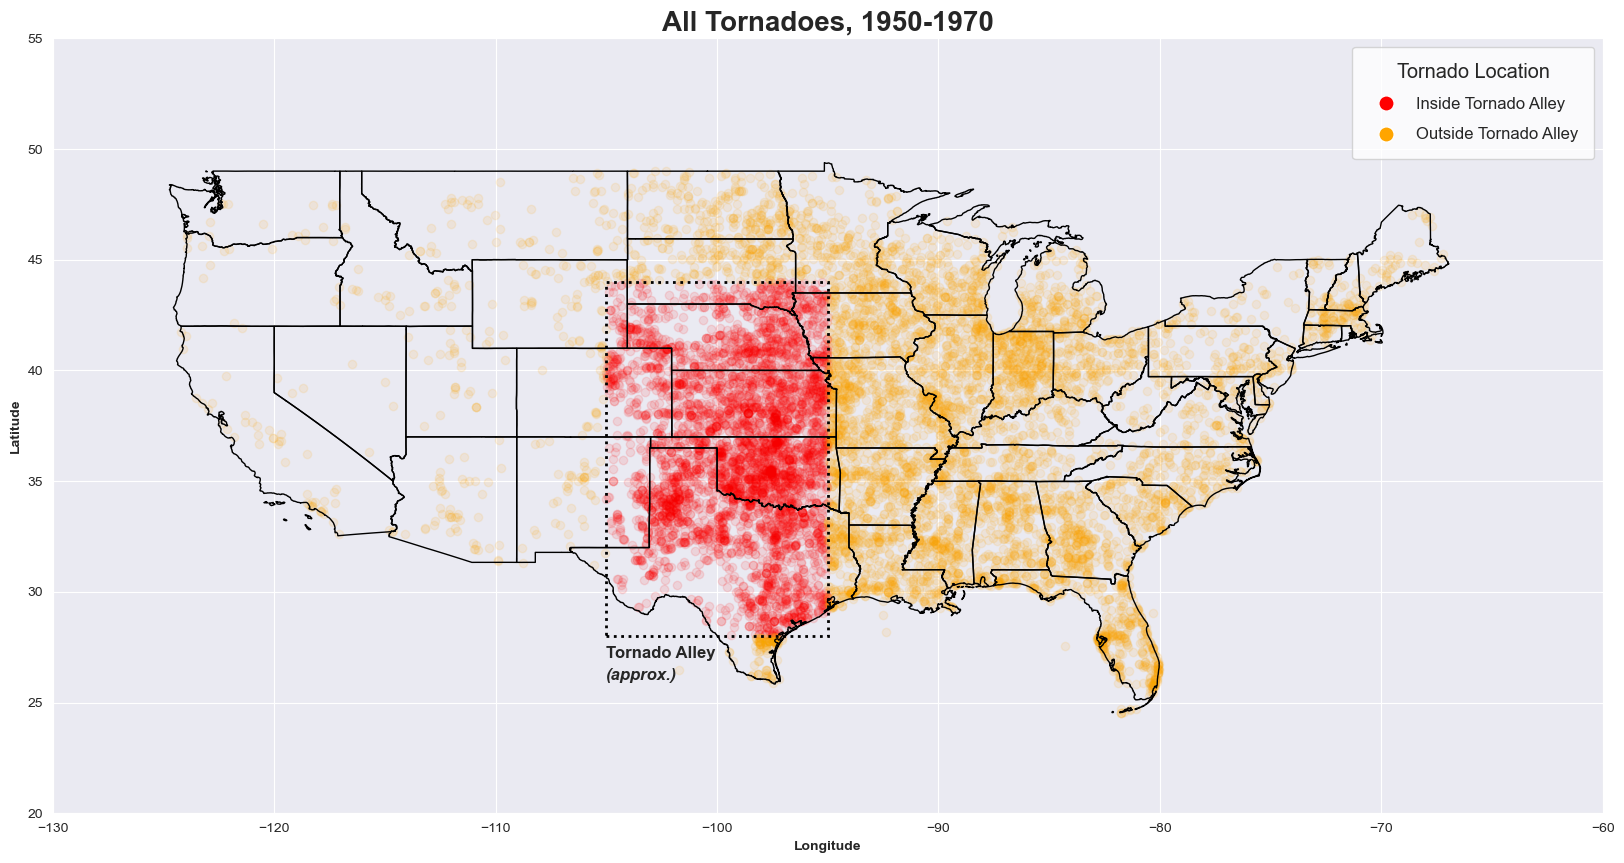

In [ ]:
# map with points of tornadoes and tornado alley, 1950
# Import necessary libraries for the geographical data
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.patches import Rectangle

# create dataframes for the conditions; one for inside, one for outside
df1 = tornadoes.query("((decade == '1950-1959' | decade == '1960-1969') & in_alley == 'Inside Tornado Alley')")
df2 = tornadoes.query("((decade == '1950-1959' | decade == '1960-1969') & in_alley == 'Outside Tornado Alley')")

# set up the geometries for the geodataframes
geometry1 = [Point(xy) for xy in zip(df1['slon'], df1['slat'])]
geometry2 = [Point(xy) for xy in zip(df2['slon'], df2['slat'])]

# create the geodataframes
tornadoes_gdf_in = gpd.GeoDataFrame(df1, geometry=geometry1)
tornadoes_gdf_out = gpd.GeoDataFrame(df2, geometry=geometry2)

# import the JSON file containing states' boundaries
states_gdf = gpd.read_file('gz_2010_us_040_00_5m.json')

# initialize the plot
f, ax = plt.subplots(figsize=(20, 15))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# plot the geodataframes
tornadoes_gdf_in.plot(ax=ax, color='red', alpha=0.1)
tornadoes_gdf_out.plot(ax=ax, color='orange', alpha=0.1)

# plot the box which will outline tornado alley
alley_box = Rectangle((-105, 28), 10, 16, fill=False, edgecolor='black', linewidth=2, linestyle='dotted')
ax.add_patch(alley_box)

# add text to the box
ax.text(-105, 27, 'Tornado Alley', fontsize=12, weight='bold')
ax.text(-105, 26, '(approx.)', fontsize=12, weight='bold', style='italic')

# overall plot title
ax.set_title('All Tornadoes, 1950-1970', fontsize=20, weight='bold')

# add a custom legend
legend_labels=['Inside Tornado Alley', 'Outside Tornado Alley']
legend_colors=['red', 'orange']
legend_handles = [plt.Line2D([0], [0], marker='o', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Tornado Location', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white')

# name labels
ax.set_xlabel('Longitude', weight='bold')
ax.set_ylabel('Latitude', weight='bold')

# change axis limits so the US is centered
ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)

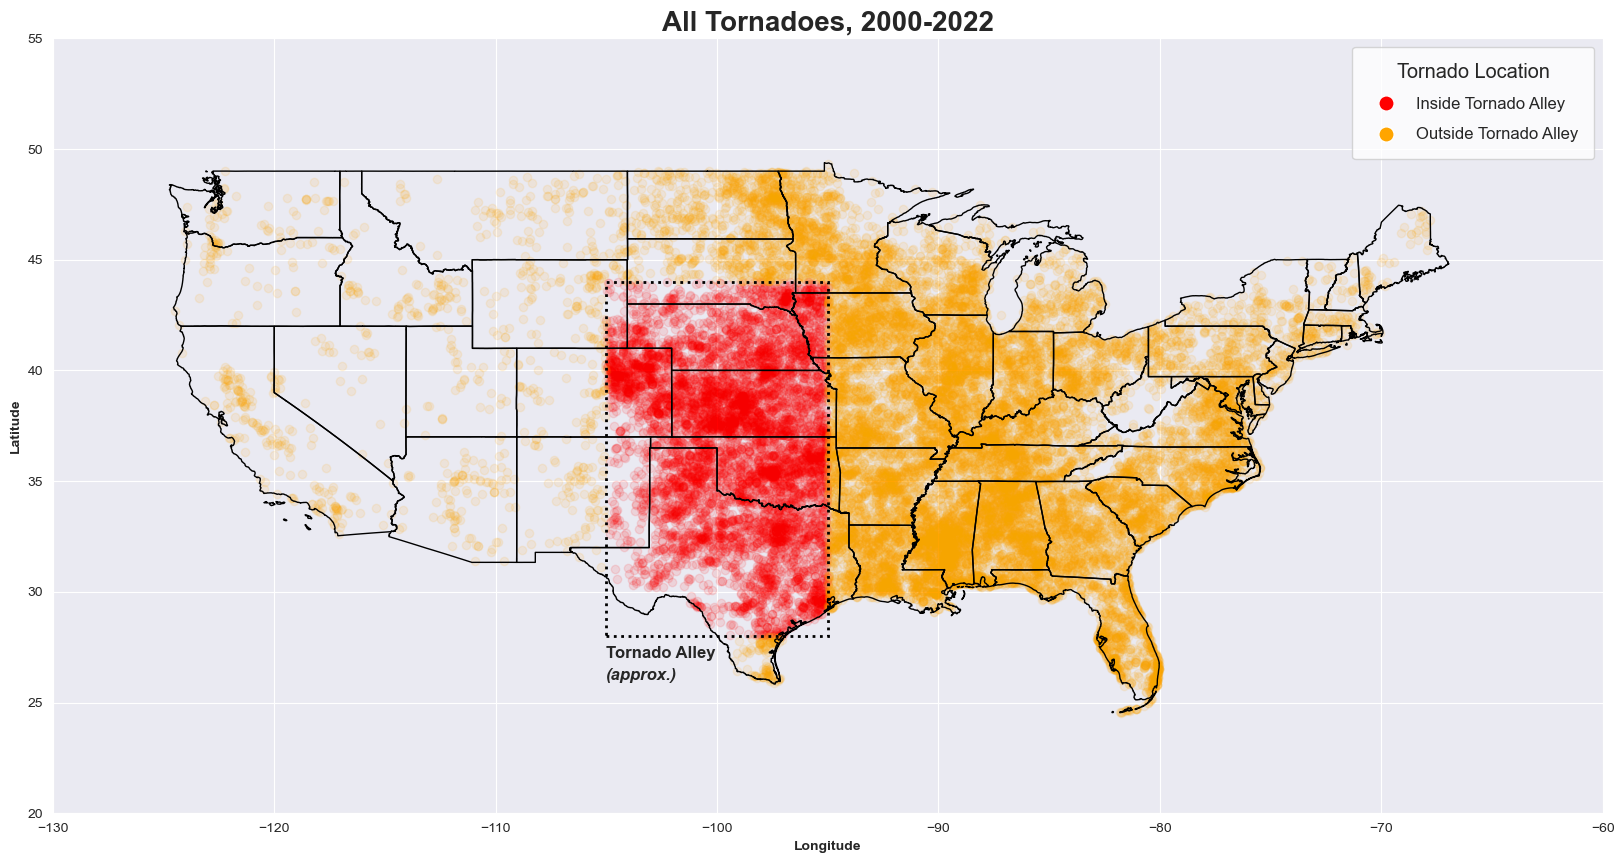

In [ ]:
# Map with points of all tornadoes and tornado alley, present day
# create dataframes for the conditions; one for inside, one for outside
df3 = tornadoes.query("((decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029') & in_alley == 'Inside Tornado Alley')")
df4 = tornadoes.query("((decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029') & in_alley == 'Outside Tornado Alley')")

# set up the geometries for the geodataframes
geometry3 = [Point(xy) for xy in zip(df3['slon'], df3['slat'])]
geometry4 = [Point(xy) for xy in zip(df4['slon'], df4['slat'])]

# create the geodataframes
tornadoes_gdf_in = gpd.GeoDataFrame(df3, geometry=geometry3)
tornadoes_gdf_out = gpd.GeoDataFrame(df4, geometry=geometry4)

# initialize the plot
f, ax = plt.subplots(figsize=(20, 15))

# initialize the state boundary plot
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# plot the geodataframes
tornadoes_gdf_in.plot(ax=ax, color='red', alpha=0.1, )
tornadoes_gdf_out.plot(ax=ax, color='orange', alpha=0.1)

# plot the box which will outline tornado alley
alley_box = Rectangle((-105, 28), 10, 16, fill=False, edgecolor='black', linewidth=2, linestyle='dotted')
ax.add_patch(alley_box)

# add text to the box
ax.text(-105, 27, 'Tornado Alley', fontsize=12, weight='bold')
ax.text(-105, 26, '(approx.)', fontsize=12, weight='bold', style='italic')

# overall plot title
ax.set_title('All Tornadoes, 2000-2022', fontsize=20, weight='bold')

# add a custom legend
legend_labels=['Inside Tornado Alley', 'Outside Tornado Alley']
legend_colors=['red', 'orange']
legend_handles = [plt.Line2D([0], [0], marker='o', color='White', label=label, 
                             markersize=11, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Tornado Location', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=1, facecolor='white')

# name labels
ax.set_xlabel('Longitude', weight='bold')
ax.set_ylabel('Latitude', weight='bold')

# change axis limits so the US is centeredd
ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)
plt.show()

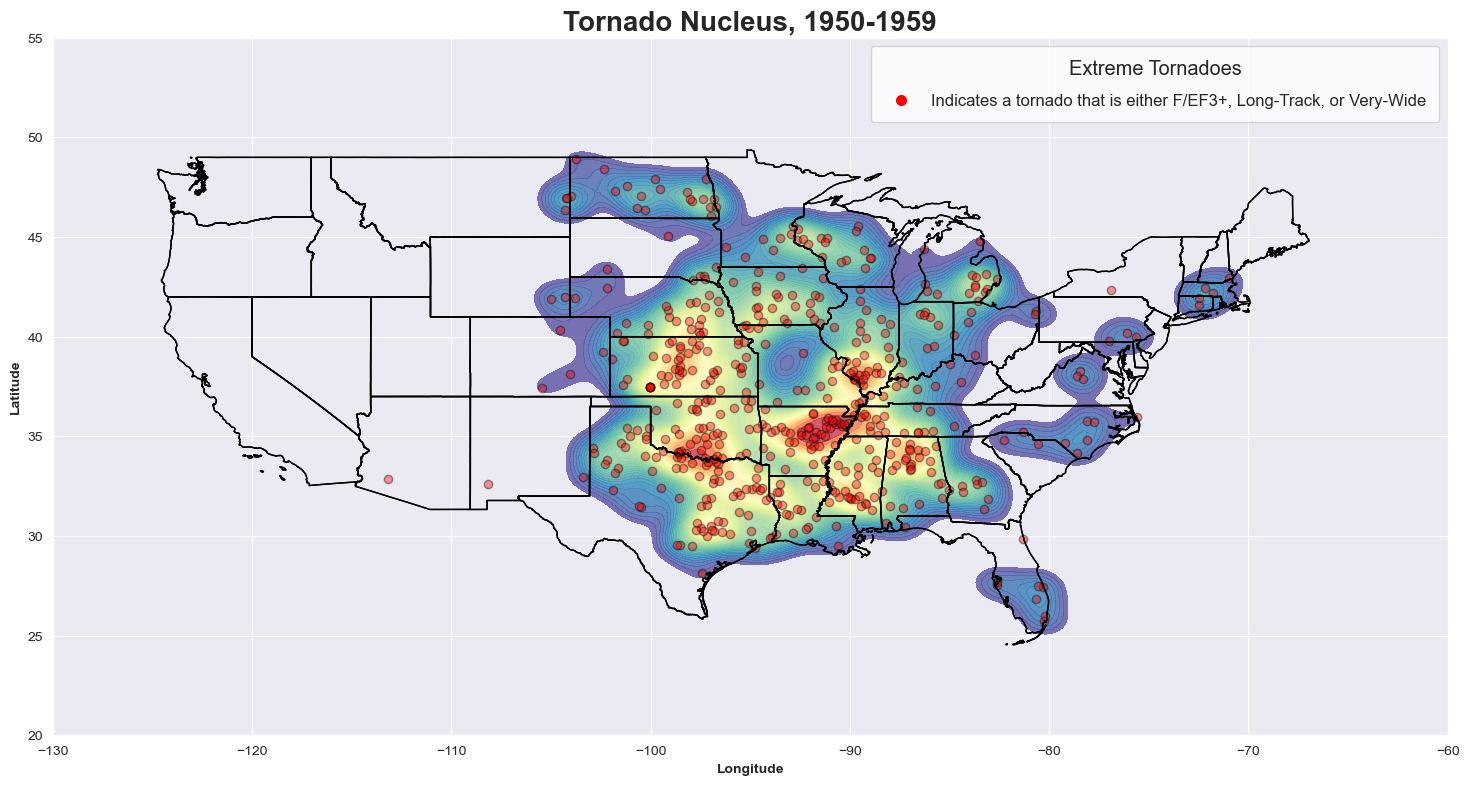

In [ ]:
# a plot of tornadoes in earlier years

# set up dataframe with conditions
df1 = tornadoes.query("decade == '1950-1959' & (mag >= 3 | len_level == 'Long' | wid_level == 'High')")

# set up geometry for geodataframe
geometry1 = [Point(xy) for xy in zip(df1['slon'], df1['slat'])]

# set up geodateframe
tornadoes_gdf_kde = gpd.GeoDataFrame(df1, geometry=geometry1)

# initialize the plot
f, ax = plt.subplots(figsize=(18, 12))

# initialize the states gdf boundary for plotting
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# initialize the states gdf boundary for plotting
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# show the kde plot
sns.kdeplot(x=tornadoes_gdf_kde['slon'], y=tornadoes_gdf_kde['slat'], ax=ax, levels=40, fill=True, alpha=0.8, bw_method=0.15, cmap="Spectral_r")
tornadoes_gdf_kde.plot(ax=ax, color='red', alpha=0.4, edgecolor='black')


# overall plot title
ax.set_title('Tornado Nucleus, 1950-1959', fontsize=20, weight='bold')

# create custom legend
legend_labels=['Indicates a tornado that is either F/EF3+, Long-Track, or Very-Wide']
legend_colors=['red']
legend_handles = [plt.Line2D([0], [0], marker='o', color='White', label=label, 
                             markersize=9, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Extreme Tornadoes', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=0.8, facecolor='white')

# name labels
ax.set_xlabel('Longitude', weight='bold')
ax.set_ylabel('Latitude', weight='bold')

# set axis limits to only show the U.S.
ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)
plt.show()

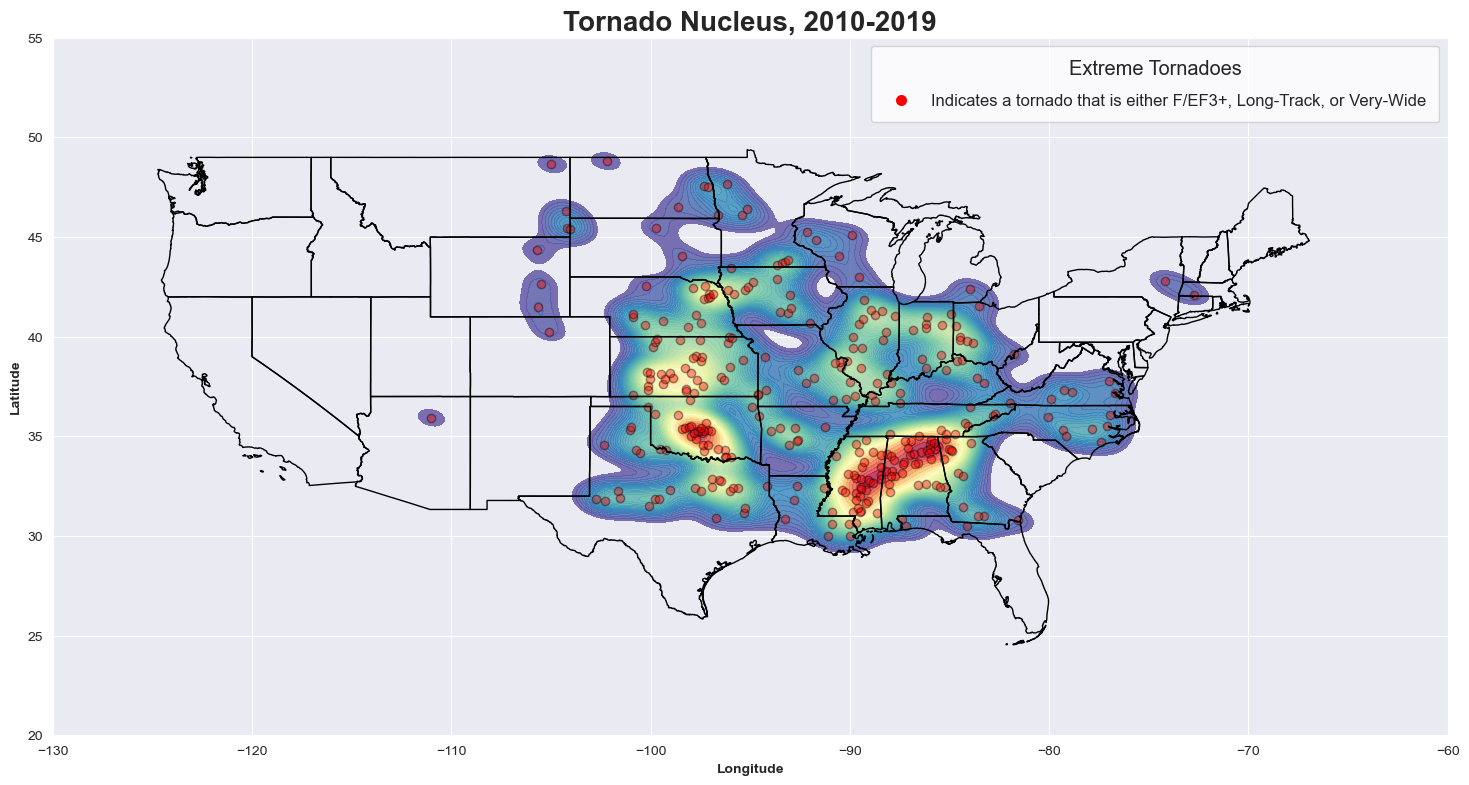

In [ ]:
# a plot of tornadoes in later years
# set up data frame with conditions
df1 = tornadoes.query("decade == '2010-2019' & (mag >= 3 | len_level == 'Long' | wid_level == 'High')")

# set up geometry for geodataframe
geometry1 = [Point(xy) for xy in zip(df1['slon'], df1['slat'])]

# set up geodateframe
tornadoes_gdf_kde = gpd.GeoDataFrame(df1, geometry=geometry1)

# initialize the plot
f, ax = plt.subplots(figsize=(18, 12))

# initialize the states gdf boundary for plotting
states_gdf.boundary.plot(ax=ax, linewidth=1, color='black')  

# overall plot title
ax.set_title('Tornado Nucleus, 2010-2019', fontsize=20, weight='bold')

# show the kde plot 
sns.kdeplot(x=tornadoes_gdf_kde['slon'], y=tornadoes_gdf_kde['slat'], ax=ax, levels=40, fill=True, alpha=0.8, bw_method=.15, cmap="Spectral_r")
tornadoes_gdf_kde.plot(ax=ax, color='red', alpha=0.4, edgecolor='black')

# create custom legend
legend_labels=['Indicates a tornado that is either F/EF3+, Long-Track, or Very-Wide']
legend_colors=['red']
legend_handles = [plt.Line2D([0], [0], marker='o', color='White', label=label, 
                             markersize=9, markerfacecolor=color, linestyle='None') 
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Extreme Tornadoes', fontsize='large', title_fontsize='x-large', labelspacing=0.9, borderpad=0.8, facecolor='white')

# name labels
ax.set_xlabel('Longitude', weight='bold')
ax.set_ylabel('Latitude', weight='bold')

# set axis limits to only show the U.S.
ax.set_ylim(20, 55)
ax.set_xlim(-130, -60)
plt.show()

**Affected Regions and States**  
*> Below, we can see the areas with highest overall tornado frequency, categorized by US cultural regions and then the top 10 states.*  
*> The data is further broken down by time, showing the counts by regions and states for early decades and late decades of the dataset.*  
*> Analyzing regions: the overall frequency, as we have already found, is noticibly higher in all regions. the midwest continues to reign as the hub of tornado-producing storms, but other regions outside of it are seen to creep up to its level in later decades. This might serve as evidence that these extreme weather events are spilling over from what we refer to as 'tornado alley', into other regions. In particular, the Deep South. The upper south has also switched places with the southwest. Smaller changes are seen in more peripheral parts of the US, which while not clear from this data, it still serves as a useful indicator that investigation can be done into the smaller climatological changes in these areas.*  
*> Analyzing states: Much of the same patterns noted for regions can be witnessed in the top 10 states. The overall frequency is certainly greater for each state in general. Texas remains the top area for tornado frequency, but earlier patterns are disrupted by the late decades, with Kansas taking Oklahomaa's historical spot in second place. This isn't overly shocking as Kansas is still in the midwestern region, but Oklahoma's place being further down the list does invoke further insight. Namely, the fact that Missisippi and Alabama come before Oklahoma now. This is strong evidence for a changing locale of tornado frequency. There are some other shifts in states further down the list, which can be seen again as indicators of interesting smaller climate patterns that a more in-depth analysis could provide.*

Text(0.5, 1, '2000s-2022')

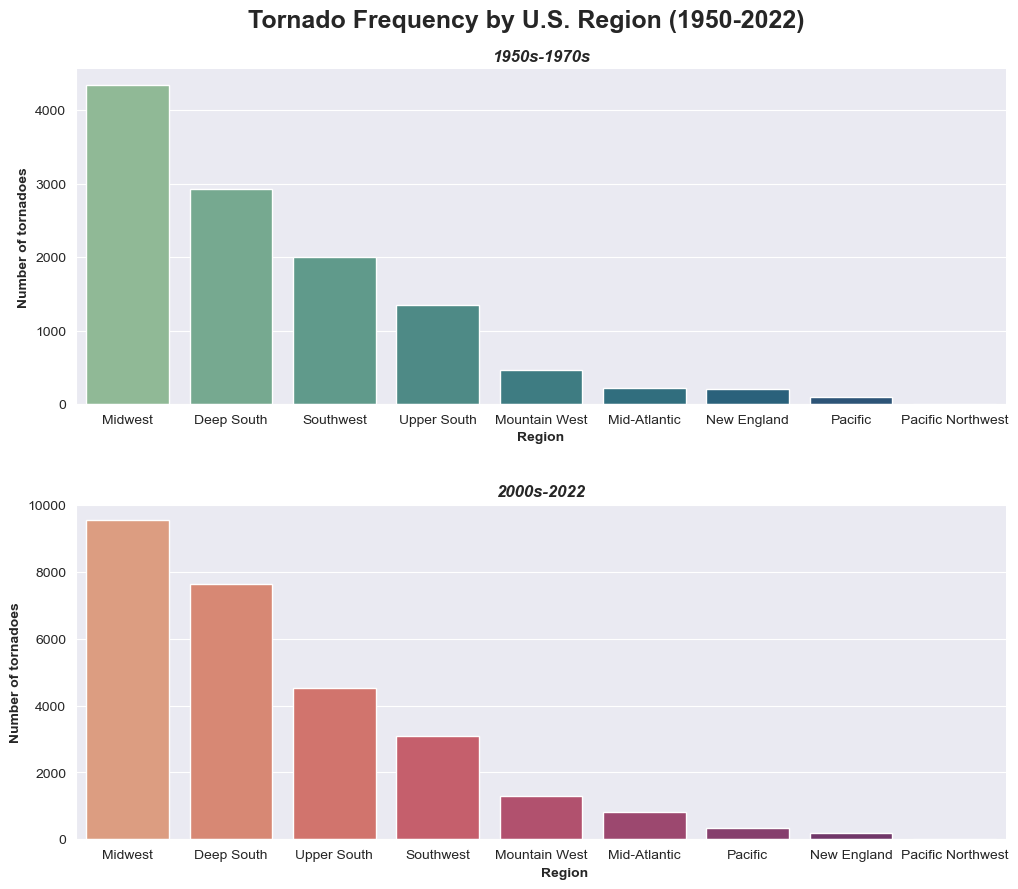

In [ ]:
# Plotting and styles
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.despine()

# Plot for 1950s
regions_early = tornadoes.query("decade == '1950-1959' | decade == '1960-1969'")
region_order_1950s = regions_early['region'].value_counts().index     # Specify descending order
sns.countplot(x="region", data=regions_early, palette='crest', order=region_order_1950s, ax=ax[0])
ax[0].set_title('1950s-1970s', weight='bold', style='italic')
ax[0].set_xlabel('Region', weight='bold')
ax[0].set_ylabel('Number of tornadoes', weight='bold')

# Plot for 2010s
regions_late = tornadoes.query("decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029'")
region_order_2010s = regions_late['region'].value_counts().index     # Specify descending order
sns.countplot(x="region", data=regions_late, palette='flare', order=region_order_2010s, ax=ax[1])
ax[1].set_title('Regions: 2000s-2022', weight='bold')
ax[1].set_xlabel('Region', weight='bold', ha='left')
ax[1].set_ylabel('Number of tornadoes', weight='bold')

# Set the main title using suptitle
plt.gcf().suptitle('Tornado Frequency by U.S. Region (1950-2022)', fontsize=18, y=0.94, weight='bold')

# Set the subtitle using set_title on the current axes
plt.gca().set_title('2000s-2022', fontsize=12, weight='bold', y=1, style='italic')

Text(0.5, 1, 'Top 10 States, 2000s-2022')

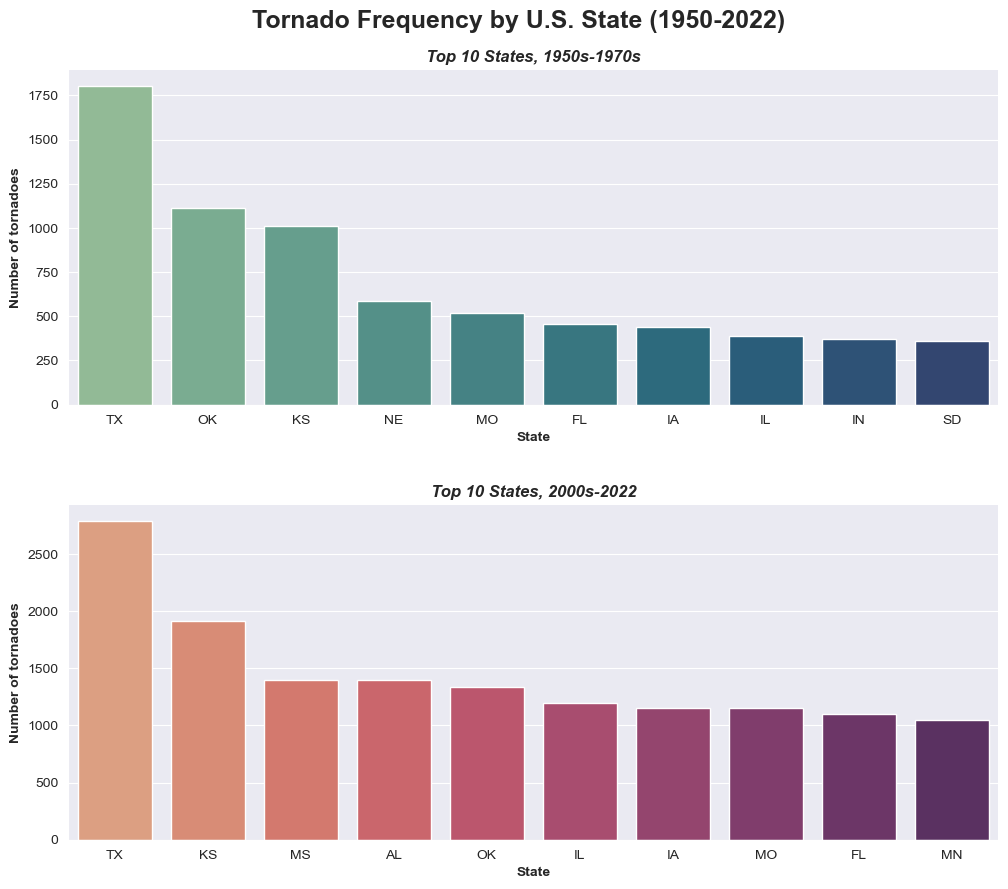

In [ ]:
# Plotting and styles
sns.set_style('darkgrid')
f, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.5)
sns.despine()

# Plot for 1950s-1970s
# Filter by top 10 states
states_early = tornadoes.query("decade == '1950-1959' | decade == '1960-1969'")
top_10_states_1950s = states_early['st'].value_counts().head(10).index
sns.countplot(x="st", data=states_early, palette='crest', order=top_10_states_1950s, ax=ax[0])
ax[0].set_title('Top 10 States, 1950s-1970s', weight='bold', style='italic')
ax[0].set_xlabel('State', weight='bold')
ax[0].set_ylabel('Number of tornadoes', weight='bold')

# Plot for 2000s-2022
states_late = tornadoes.query("decade == '2000-2009' | decade == '2010-2019' | decade == '2020-2029'")
# Filter by top 10 states
top_10_states_2000s = states_late['st'].value_counts().head(10).index
# Plot for states
sns.countplot(x="st", data=states_late, palette='flare', order=top_10_states_2000s, ax=ax[1])
ax[1].set_title('Top 10 States: 2010s', weight='bold')
ax[1].set_xlabel('State', weight='bold')
ax[1].set_ylabel('Number of tornadoes', weight='bold')

# Set the main title using suptitle
plt.gcf().suptitle('Tornado Frequency by U.S. State (1950-2022)', fontsize=18, y=0.94, weight='bold')

# Set the subtitle using set_title on the current axes
plt.gca().set_title('Top 10 States, 2000s-2022', fontsize=12, weight='bold', style='italic', y=1)

In [ ]:
import numpy as np

# read the csv file
df = tornadoes
# Filter and group the data by year to analyze trends over time
df['date'] = pd.to_datetime(df['date'])  # Convert the 'date' column to a datetime object
df['yr'] = df['date'].dt.year  # Extract the year from the 'date' column
# Group by year and calculate property loss and fatalities
property_loss_by_year = df.groupby('yr')['loss'].sum()
fatalities_by_year = df.groupby('yr')['fat'].sum()
# Calculate mean and median for property loss and fatalities for each year
property_loss_mean = df.groupby('yr')['loss'].mean()
property_loss_median = df.groupby('yr')['loss'].median()
fatalities_mean = df.groupby('yr')['fat'].mean()
fatalities_median = df.groupby('yr')['fat'].median()
# tornado path length
path_length_mean = df.groupby('yr')['len'].mean()
path_length_median = df.groupby('yr')['len'].median()
# tornado severity
tornado_severity_mean = df.groupby('yr')['mag'].mean()
all_avg_severity = df['mag'].mean()
tornado_severity_median = df.groupby('yr')['mag'].median()

plt.figure(figsize=(10, 3))
plt.subplot(1, 1, 1)
plt.plot(tornado_severity_mean.index, tornado_severity_mean, label='Average Severity', color='red')
plt.plot(tornado_severity_median.index, tornado_severity_median, label='Median Severity', color='purple')
# plt.plot(0,all_avg_severity, label="Cumulative Avg Severity", color='blue')
plt.axhline(y=np.nanmean(df['mag']))
plt.title('Tornado Severity Over Time')
plt.xlabel('Year')
plt.ylabel('Tornado Severity')
plt.legend()
plt.tight_layout()  
plt.show()

In [ ]:
injuries_by_year = df.groupby('yr')['inj'].sum()

# Calculate mean and median for property loss and fatalities for each year
injuries_mean = df.groupby('yr')['inj'].mean()
injuries_median = df.groupby('yr')['inj'].median()

#graph to represent loss, fatalities, path length, and tornado severity
plt.figure(num=1,figsize=(10, 2))
plt.subplot(1, 1, 1)
plt.plot(property_loss_mean.index, property_loss_mean, label='Property Loss')
plt.title('Avg Property Loss due to Tornadoes Over Time')
plt.xlabel('Year')
plt.ylabel('Property Loss (Dollars)')
plt.legend()

plt.figure(num=2,figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.plot(fatalities_mean.index, fatalities_mean, label='Avg Fatalities')
plt.title('Avg Fatalities due to Tornadoes Over Time')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(injuries_mean.index, injuries_mean, label='Avg Injuries')
plt.title('Avg Injuries due to Tornadoes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.legend()